In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

## Загрузка данных из  csv и предварительный анализ

In [2]:
df = pd.read_csv('Data/data.csv')

In [3]:
df.head()

,Unnamed: 0,correct_answer,spent_time,pass_date,num_attempt,course_id,question_id,topic_id,user_id,is_ok
0,0,0,30000000,2020-05-09 12:54:57.638181,0,1,1,1,1,1
1,1,0,24000000,2020-05-09 12:54:57.657616,0,1,2,1,1,1
2,2,0,28000000,2020-05-09 12:54:57.667589,0,1,3,1,1,1
3,3,0,67000000,2020-05-09 12:54:57.681554,0,1,4,1,1,1
4,4,0,55000000,2020-05-09 12:54:57.692524,0,1,5,1,1,0


Уберем лишние данные

In [4]:
del df['Unnamed: 0']
df.head()

,correct_answer,spent_time,pass_date,num_attempt,course_id,question_id,topic_id,user_id,is_ok
0,0,30000000,2020-05-09 12:54:57.638181,0,1,1,1,1,1
1,0,24000000,2020-05-09 12:54:57.657616,0,1,2,1,1,1
2,0,28000000,2020-05-09 12:54:57.667589,0,1,3,1,1,1
3,0,67000000,2020-05-09 12:54:57.681554,0,1,4,1,1,1
4,0,55000000,2020-05-09 12:54:57.692524,0,1,5,1,1,0


## Выведем несколько статистических графиков для изучения полученных данных

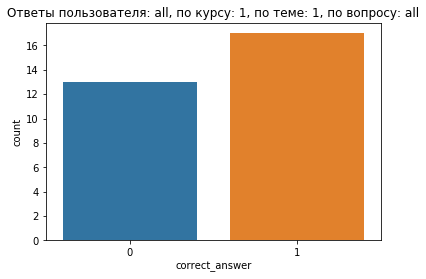

In [5]:
course =1
topic = 1
question = 'all'
id = 'all'
start_date = '2020-05-01'
stop_date = '2020-05-10'

if id != 'all':
        df = df[df['user_id'] == id]
if course != 'all':
        df = df[df['course_id'] == course]
if topic != 'all':
    df = df[df['topic_id'] == topic]
df = df[df['pass_date'] >= start_date]
df = df[df['pass_date'] <= stop_date]
    
plt.title("Ответы пользователя: " + str(id) + ", по курсу: " + str(course)
              + ", по теме: " + str(topic) + ", по вопросу: " + str(question))
sns.countplot(x='correct_answer', data=df)

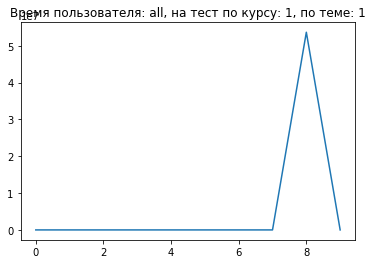

In [6]:
time = list(range(10))
for i in range(0, 9):
    buf = df[df['question_id'] == i]
time[i] = buf['spent_time'].mean()
plt.title("Время пользователя: " + str(id) + ", на тест по курсу: " + str(course)
              + ", по теме: " + str(topic))
plt.plot(time)

## Построим дерево решений 

In [7]:
del df['pass_date']
df.head()

,correct_answer,spent_time,num_attempt,course_id,question_id,topic_id,user_id,is_ok
0,0,30000000,0,1,1,1,1,1
1,0,24000000,0,1,2,1,1,1
2,0,28000000,0,1,3,1,1,1
3,0,67000000,0,1,4,1,1,1
4,0,55000000,0,1,5,1,1,0


In [8]:
y_train = df.pop('is_ok')

In [11]:
classifier = DecisionTreeClassifier()
classifier.fit(df, y_train)
x = classifier.predict(df)
classifier.score(df, y_train)

1.0